# Tutorial Local RNA folding revisited

This tutorial shows an example of the revisited local RNA folding using the miR-17~92 microRNA cluster.

In [1]:
import RNA
import sys
sys.path.insert(0,'src')
import plot
from classPLfoldRevistited import PLfoldRevisited
import pandas as pd
import numpy as np
from Bio import SeqIO
import os
from PIL import Image

### Set up output folders
Prediction results can be precomputed and saved to a data directory(`data_dir`) for further analysis. Figures can be saved to pdfs with a plots directory (`plot_dir`). Please provide folder paths below.

In [2]:

data_dir = 'data/results' # results subfolder is automtical generated by local sampling class

plot_dir = 'data/plots'
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

## 1. Implementation

The main part of the implementation can be found in the `classPLfoldRevistited.py` file.

The implementation of the plots is available in `plot.py` (see section *3. Analysis* and *4. Parameter validation*).

The class `PLfoldRevisited` calculates all three different models, the local sampling, which was implemented for this work, the local exact model (PLfold), and the global sampling (RNAfold), both from the ViennaRNA package. 

The following parameters are required for the input:

| **input parameter**          | Description                              |
|-----------------|-------------------------------------------------------|
| seq_id          | sequence id                                           |
| sequence        | nucleotide sequence                                   |
| window_size     | size of windows                                       |
| num_samples     | number of structure samples per window                |
| max_bp_span     | maximum allowed basepair span                         | 
| data_dir        | output directory                                      |
| recalculate     | enforce recomputation of prediction results (default: False)|


The outputs can be reached using the following scheme:


| **local_sampling**          | Description                                       |
|------------------|---------------------------------------------------|
| unpaired_P       | unpaired probability per position                 |
| cond_unpaired_P  | conditional unpaired probability per position pair|
| joint_unpaired_P | joint probability for two position to be unpaired |
| paired_P         | paired probability per position |
| cond_paired_P    | conditional paired probability per position pair |
| joint_paired_P   | joint probability for two position to be unpaired  |
| mu               | mutual information |
| bp_P             | base pair probabilities |
| mea_DB           | mea structure as dotbraket string |
| mea_E            | mea energy in kcal/mol |
| mfe_E            | mfe energy in kcal/mol |
| mfe_DB           | mfe structure as dotbraket string |


| **local_exact**          | Description                                       |
|-----------------|---------------------------------------------------|
| unpaired_P      | unpaired probability per position|


| **global_folding**           | Description                                       |
|------------------|---------------------------------------------------|
| unpaired_P | unpaired probability per position|
| bp_P     | base pair probabilities|


For example, the position wise unpaired probabilities computed by the local sampling approach can be accessed through `plfoldrevisited.local_sampling.unpaired_P`.

## 2. Dataset

### 2.1 miR-17 cluster

As an illustrative example we use the human *MIR17HG* gene, which harbours the miR-17~92 microRNA (miRNA) cluster. This gene includes six known miRNAs: miR-17, miR-18a, miR-19a, miR-19b-1, miR-20a and miR-92a-1.

NOTE: The predictions on the whole MIR17HG sequence (6757nts) may take a while (~30 minutes) on a standard cpu.

To avoid recalculation data `classPLfoldRevistited` first check in the given data directory (`data_dir`) if precomputed data already exists. If it is not the case, the computation starts and the results are then automatically stored in the data directory. A recalculation of a sequence can be enforced with the flag `recalculate=True`.


In [3]:
# get nucleotide seqeunce of MIR17HG (NG_032702.1/5000-11756)
record = list(SeqIO.parse('data/examples/NG_032702.1.fasta', "fasta"))
mir_17_id = 'mir17HG'
mir_17_seq = str(record[0].seq).replace('T', 'U')[4999:11756]

# coordinates of known matur miRNAs within MIR17HG
mir_17_annotations = [[2799, 2858], [2937, 3001], [3084, 3143], [3253, 3311], [3387, 3449], [3504, 3564]]


# subsequence of mir17HG that includes all annotated miRNAs for testing purposes
mir_17_short_id = mir_17_id+'_short'
mir_17_short_seq = mir_17_seq[2500:4500]


In [4]:

# alternative input for running analysis on whole MIR17HG (as done in the paper)
#sequence = mir_17_seq
#my_id = mir_17_id


sequence = mir_17_short_seq
my_id = mir_17_short_id

print(my_id, '\t', len(sequence))

win_len=200
nsample=400
max_bp_span=150
data_dir = 'data/results'

mir17HG = PLfoldRevisited(my_id,
                          sequence,
                          win_len,
                          nsample,
                          max_bp_span,
                          data_dir,
                          #recalculate=True
                         )


mir17HG_short 	 2000


In [5]:
# alternative input for running analysis on whole MIR17HG (as done in the paper
sequence = mir_17_seq
my_id = mir_17_id

print(my_id, '\t', len(sequence))

win_len=200
nsample=400
max_bp_span=150
data_dir = 'data/results'

# to run predictions on whole MIR17HG use code in folowing comment block:
'''
mir17HG = PLfoldRevisited(my_id,
                          sequence,
                          win_len,
                          nsample,
                          max_bp_span,
                          data_dir,
                          #recalculate=True
                         )
                         
'''


mir17HG 	 6757


'\nmir17HG = PLfoldRevisited(my_id,\n                          sequence,\n                          win_len,\n                          nsample,\n                          max_bp_span,\n                          data_dir,\n                          #recalculate=True\n                         )\n                         \n'

### 2.2 Generate random sequences and run predictions

For additional testing, data on random sequences with unifirm nucleotide composition can be generated here:

In [6]:
# provide sequence length here:
seq_len = 300

sequence = RNA.random_string(seq_len, 'ACGU')
seq_id = 'random_{}'.format(seq_len)

print(seq_id)
print(sequence)

max_bp_span = 35
window_size = 40
nsample = 200
data_dir = 'data/results'

random_data = PLfoldRevisited(seq_id=seq_id,
                            sequence=sequence,
                            window_size=window_size,
                            num_samples=nsample,
                            max_bp_span = max_bp_span,
                            data_dir=data_dir,
                            #recalculate=True
                           )

random_300
AACGAACUUUGAGCGUGUUACGCCGUCAAGACCGAUAUGUAAUUAGCGGUAGUGUGAGCCGGGACCUAGAUAUAGUACUCUAUCUCUUGCUGUGACUACCCGGCAGUGUUUCUACGCGCCCAAGCUACCACGAAGGGGAAAGAAUCUAGUGUGUAGAAGGCUCGGGACCCUAGAUUUAUUUUUCACUCGCCAUUAAAGACAUGAGCAUAACAGCCCUCCUCUUCGAGCAAAUGCGGAUUGCUAGGGUUCUUGGUUGAGCGGCAAGAAACAGAUUCCUAUCCGGGGUACACACAGCGGGAC


### 2.3 Random sequences used in publication/draft

In [7]:
seq_data = [
    {'id': 'r2000_1', 'seq': 'UCCCAUGGCUUUUUUAUCAAGACGACGUGCUAUGGUAGUCCGGCUUUUCAGUAACUCGAGACAUUAUCCCUGAAAAAGGGUCAGGCACAAUACUGAUGUUGUCAGAGCAGGUGUGUAUUAUUUGUAAUGAUAUUACAUAAUAGAGACCCCCUACAUCCGAGCCCUACUCGCUGGGCGUAAGCGCCAACUGUGAAAGAAGCGUCAAUACGGAUUUCUGGUAAAUUUGGUAAAGGCUGCAAAUGUGUCCCACAAGUAUAGGUAUGGCGACCGCGGAUUAGCUUCUGAGUUUCAACGAUAGAAGUAAAGUAGGGGACAUGGCCCCACCCACGGUUAGAAUUUCCCGUUUCGGGAAUCAUCUAUUGCGGUCUAGCGAAAGUUGGAAGCAACGGGCGCCACUCUUACCGUGAAACAUAAUUACGAUACCGAACUGCGGGGCCCCGAUGACACUCACAUGGAUCUGCCAACCCCCCGGUUCGGUACCUCUGCUGACGGAAGAGGCUUCGCUCGAACUAGGAUACCGAAUUAUAGGGAUACGUGACGUAGGCGGGAAUUUUCUUGGUAGGAACCCGAACUAGCAGCUAAGCUCCCACACAAUAAUUGUGAAACCAAGUCAGAAAAUAACUGGGCUACAAUCCCUCCGGACCGAUGUAGCUAUGCAUGCAGUACUACGCCCCGAGAAGCGGCAGAGGGCUGUGCGUGUUAAUUCGCAAGGCCUCUGUUGUUGUUCUGCAAUGCUUCAGAUAUGCUUCGGAUUGUCCUAGAAUCUGUGAUUUGUCGUCGCCCAUGUUUUCUUCGAACUCCUCAACAUCGCGAGGCGGGUACGAAUAUGGUGUCCGAUCUUGCCACCAGUUUUAAACAGGAGAUCUAGCCAACGGUCAAAACGCCUGAACGCACCGUAGCUCAUCAGUAUUUCCCACAUCCUCUGACCUAGCCAUUCCCAACUGCAAGUCCUAAGUACGGCUCUGAGCGUAGGUAGCUUUGAGCCUUGCCCUAUCAACAUGUCCAGUGCACUCCCUUGAGGCUCGAUGUGAGUUUCUGCCCAUAGUCUCCCGAAGCACAUUGAUCGGGCGAUUAAGCAGCGCCCCCGUUAAUCUUCGCUCAGCGUCACCCGGCUUGUCCUGUCCCCACAUGAGGUAACAAGCAGGGGAAGCAACGUGAAUAAAGGCAGUUAAGGCCGCCGCUUUGUUCGCGUCAAAAGAGUGAAUGAUACAACCUGCCACGGUCCGUCACUAAAGAUUUAUGUGCUGGGCUUGAGGAACACUGUACGGAGUGCGGCGACGGGCACGAUCAAGGAAACACAAGCUAUUGCUAUUGGCGUGACGAUAGGUCAAAAGGGAUCGUCCAAACUGUAAUUGGUACGCGCGAUUGGUGACUUAUCGGUUUGCACCCGGGGUUUUAAAGUGAUGCGUGAGGAGUUGUAUGGGAUGAGGACGUCCGCUCGAUGAGCGUUAAGGAGGUUACCGACAACCGCGCAUAUAAUCGGACGAAGAGUCCUUUUCUGCGCGGCAGCGUAUUGGUAUUAACUGGUUCAGGUCGCCGGGGAUCUUAGUAUGCGGGAGUUCAAACUGAAUACAGACUCAUCUCCUGCUCAAACGAACCCGUUUCAGCCCUUCGUCUCUGGCGCUCUCGUCGAUAACUCAUCGAUUCUAACGACGUGAGUUGCCUGGUGUCCUAUCCAAACAUGAGCCCCCACCCCACUUAAACCAUGAUUUAAGGAGUCAUUCCGUGCGAGCGUUGCUGUUUGCAGGAAGAGCGGAGGGGGAACAGCCGAUCAAUUGCCGACAUCGAGCUAACCUAUACAUUCACUGGCAACCGAAAUGCCUAGUUGGCGCUCAGCGUUUUAUACCGGCUGGAAAUAUCGGGAAGUAGGUAAUGCGCGUCGCAGGUCUGUUUGUUUCACGUGCAUCGUGCGAUCAUCGCGUCUUAAAGGCGCUCAAUCCCCCGCGCCACUGGAUAUUUAUUAGUUUGUCAAGUUCUAACAACAGGUACAGCAGAAAGGG'},
    {'id': 'r5000_1', 'seq': 'CCUCUAUCUCAAUUUACAGGAGUCAUUUUUCUUCUAUCCCCAACGGCCAAGUGACAAUCAAGUAUAUAAUCCGACUGACUGAUCACUUGAGCAGCGGUACUCUGUCUCUCAUAAGAGCGUGCCCCGCUGAGACGGAUAGGUAACCUUAGUAUGGUUACCCCGCCAUGUAAUCGGCUACGCUCAAACGAAAGCUUGCCCGUUAUAUAUUGGUGCCAUACGACGACCACUGUAGGUUACGAUGCUUGAGCGGCUUUAUGGAGCACGGCGAAGAUUAUCACCCCGCCUAAAGCAAUCCCCCACCGGACCUUGACGAGUGGGAAUUUGCACUCAUAAACACUGACAGCAUAGUAAGAGGCGUCUCGGUUAAAUGUAGCAAAAACAUAAAUAACAGGCUCAUGUGAAAUGCACUAUAUAACACCCAGACUCAGGGGGUCAGGCGUCUUAGAUCGGCCCGGUCCGGGCAAUGCAAAGUGUCCGAUAGUCCCGCGGCCAAAAGAUAUGGAUUACUCCAGUGUGCGCAGUGCAAGUACGUCCUCUGGGUAGCACGUCUCAAGGUCCUACUGUUACGAACAGGUCAUGCGUGUAAGCGAUCACUUAAGGCCCACCUUCUACCCGCAGACGGAUUACUCCAUGGAACUCUACAGCCAGACCUCAUUCUCUAGAGUUGAAGAGGAGAUUCGCAGAUCCGGACGGGUGCGAAACGUGAAUAGGGUCCGAUGGCUGUACGAAACAGCCAAUUGGAGGGAAACACACUUCCUAAGAUGCCUGCGGAUCUCUGUAGACGAGAUCCGAAGCGGGAAUAGGAUGAGAAUUUCAGUGCUUGGGGCAUGAAAGAAUCGGUCUCAAUACUACACCCUGUUUCCGCUAGCCCUUAAGACCCCUGCUUUAGCUCAAUAAGGGAACUUGCUGGUGCAGGGUCAGCGAUUCUUGCAAUGUAGCUCUAUUGUCUUGGUGCCAAGAAGUGUGUAAUGGAACGAGAGGACACUCAGCCGCCAGUGGCAGUAGUUGGCCAUAACCUCGCCACUGUGUAGCCAUUAUACCUUCCCAAGGGUAUCCGACUGCCCCGUCGUACGCUAGCGAGAUCGCUCAAUACAUUGAUUUGAAGAGCGCACUUGUGUCCGCUCGUUCGGCCCUGUAGAGGGGUCUUAGCGUACUUUGGUGCUGACACAUAGAGUAAUAACACUCGGGAGCGCGUUUAACUUUAAUCACCCUUGACUGGUGAAUUGAGUAAGGCACUAACCUGAGCCCUGGUGAUCUGCUGUGAUCAUGAGCUUGAUGCAGUAGUUGUAUGGAUUGAAGAUGAAUCGUAUUUUACGGAAACCGACUUGGGUCAUUCCCUGUCACAUAUGUGUUACCCAUAAUGGGUACUGGGAUCACGUAAGGGUCCCGGAGGGACUAGUUGUGACUCCGCUAUCGAACGGCCAGAACUCUUGCGAAAACUCGUACCCUCGAGAGUUGGUGGUGGACGACUUGCCCGAAUGGCCGCCGAUCUCGGCGUUGUACCGGGAACGCUGUGAGGGUAUAACGCGAACGUCGAAUCAGUGCCCCACCACCUACCUUGCCCGGACAAGCCGCCGAGACCUGGAAUCCAGCCCCCAGACGUUUAAAUGAUCGUCUUGAGAGAGGACUUUAUCCUCUUUCGUACGAAACAACGCCAAUCGCACGUUCACGAGCCUGUAUGAGGCAAGAUAAAUGUCUGCUCUUAGUGAGCGUGUUCGCCGGUCUAACUACGUUCUACCUAUUGUUGCAAGCAUCGGUGGCCUGCUCCCCUCGUUCCCAUCGGCGUUGAGGCAAAUGAUCUGUAUCAUGGGACUUACUUCACAGGCCGAGGAACGAAAUUAUGGGCUCGGUUACAACCCGACUGGGGAGCCGCCAGGGGUACGACCCGACAGCUCGUGGUCUUCCUGUCAUGCAACGACUCAAAACUCUAGUUCGACCCUUGGCCAUAAUUUCGGACGAUUGAAUCUCGCUGGAUCGCGUACUGGUCUACAAGAGCUCGACCAGGUCUCUCAGCUAGCCCUUCGGUCUCGUGGGUAGGUCAAGACAAACCUCCCAAUAGCACACCCGAAUAAAGUCCAUCCUGAAAACCAUGGGCACAUCCAGAUGUCGGUAAGCUGUAAGCUUUAGGCCUCGGAUCUUGGGGGUUGAUGCAAACGACCGGGUACGUCCUGUCCGUGCCUUGACCUCCUACCCCUCGUCAUCCGCAUAUGCAUAUUGGCCGUUAUAACACACAGAGCUCUGAGCCAUUGUCGACCCUAAUAGCGGUAAGUACGACGUACGGACCCUGUUGGUAGCACUAUUCAAUUUAGAAUCACAAUGAUCUUGAUCAUCCGACUAAAAGCCAAAUAUCAAAAGUCUGACGCGGGUGUAACGAGAGGGUGCUGUGUACAAAAUAAUCGUCGUCGCAUUUGCGAACACACAACAAUCCUACAUCCAGCAAAGAGUAGCAGGCCGUGACUAGUCUCUAUAACCCAAUUCGGUAUUUUCCGAGUAGGGCGAACCAAGUACUAAAGGUGAGGGGCACUUUAGAUCCCUCUCUGUAAAGCCGUGAUUGCUGCGACCCGUCUGGCAUGAAUUGCCGAAUCGGGAGCUUUCGCGGGUGCUAAAAAUCGUUAAGUUGCCCGCGUUCACUCAUAACUUUGGAGCCGCCAAUGACUACCCACUCUCAAUAAGGGAACCUUUCGUUCAAUCAGCCAAUCGCUAAUGCGCCCUUUCGGAGUCCGAUAGUCCCAUACAACAACUGGUGCAGACACACCGAAAAGGGCCUCUAGGACCCGGAACAGAGGACCCUGGGGGAUUGCACGGCAUGUUAAGCUGCCCGACAUGCCCCCAAGCUAAUGGAGUAGCUUCCACGACGGCGAAAUGAGCCUAGGCGCAUUCCCCGCCACAGAUAAUGUAUGAUGGCCUUACAUCAAGACACGUUGCUGGGUUGUGGUCGACUCCAAGGUUAUCGGGCGCAUGCACGGGUUACUACACGGGCUGCACCGCCGCGGACAUUACCGUGGGUACUGAAUCGUUGUUACCCCUUGUAAACAUUUUUUCCCUUGUAGGUUUAGGAUUAGGAGCCGGAUAAGCCCACGUCUCAACUAUCGAAUCUACAUUACUGAAAGGAGGUAAAGUAUAGGCAAUUUGAACCCCAAAUCGACUGGUAGCGGAGCUGGAGCGGCCAAAUCUAGACGACUUCGCUCAGUUGGUUACAAAAAUUAAUGACGCAUGCCUACAUGUGGGCCAAAUCCAGUCAUAAAGAAAACAUGAAUGCAUAUAAUUUGGGUGCCCACGACUCCGCACAUAGAUCUGGUGCCCCGAACUACUUUAGGAAUACUUUGGGAUUCUCUGUAAUUUGAGUAAGAAAGACGUCACCAGAUUGUGUUCGGCCUACAUAGUAUGCUCCGAUGUCGGCAUCCCCUGGCUAUGAUCAGUAGCAUGAUACCACUGUUAUCACACACAAAGCCGAUAAUACUAUUCUUAGCUACUCUGCGGAGGAGCGAAACGAUGGCGGACCCCGCAGGAACCUCAGACCCAAUAUGUGUGAUCAACCCGUAACCGGUUGUCAUCCUACCUGGUGAGUGCGUAUACUGCGUAACAACCCGAAAGCAACCGAUCAGCUAAUGGGUUUUUUGGGGAUCCCACAACACACAUGGGCACUAUAUAUUAGUGCCAACACUUGCGAAACGUAUGCACCCUCGGAUCUGGAUGGGGUGGUAUAUUAUCCAGAUGCCGAAGUAAAUACUCGGUUACAUGAGCGCUCGUGACCCUUUACGUCGACAUUUCUUCCUACCGGAAAUUUACAGAUAGUAGAUAUGUACGUGGGAUCUGAAAGUAGAGUGAGAAUCCCGGGAGCGGUCCCGUAGCCGAUGCUAUUACUCCAGCGAGAGGACGCGUCAAAAAGUUCUAGGUCUAAAGUUACACAGCGAAUGAAAUUAUUAAGGUUAGAUCUAAGACAGGCAGCGGUGCACCAGAGCGGCAAGUCAAUUGUGAAGCCCUUGAGUGAGAGUAGUAACAUGAUCCGGGUGUUCCAUCGAGGAGCGACCCGAUACCCUCCGGCAACCCUCGUCUUACAGCUACUAAUCGGGUCCCUCGCCGCCUAACAUACUAAUCGGGGCCGCAAGUAGGUCCUCUCGUUCCGUGACUUGUCGGUUUGCGUCGUCGAUUAAAAAGGAUUAGAUCAAGAGUGCGUAUGAUCGAGUUUAACUCGAACCUUCCAGUAUACCAGCCAGAUCUCGCUGGCUGCCAACAUCCUGCGUGAAACCGGUAGGCCGAGUUACUCGGAACAGUACUUUUAGACCGCAUCACAGCAAUGAACAGUAUCUAGAAUAUUACGGGAUGAUAGACUGUGUCUCGUUCAAAUGUCGCCAAACCAAUGCAAGUACUCCAGACGCAACCUGUGUCACGUUGGUCUGUCCGUCGCGGAAGUGGCCGAUAUUAUUGAUCCUCCAUGAACUCGGCCGAUGGGUUGGCCAUAUAGGAACGGGGUUUAGCCAAUUCGGAGAACAGUCCCGUCGAACGACACCACCACUCAGGCGUAAGGGGGCACAUGAAUCUCUAUGAAGUCAAUCCCACGUAGCUAUCUCCUCGCGACAUGUAUAGACUACCAGUCCUACCGUGCGCUUAUGUUUUGAAGUGUAAAUCGUGGUAACUGGCUUUAGGCAUAGAGGACCUAGGGGUAAUCUGACAUCGUUCGGGGAAUACCCCCCAAAUGAUGGUGAUGGUACAGUUUAUUUUUGGAAACUAGAGGGUGCGCAGAAUUCUAGGUCAGAGGCACAGCAUAAAGAUCCGGCUCCAGCAGCGACAUUGUUUAAGAUAAAUAAAGCGUCCCCACGUCUUACCCGUUCCGUCGCGACUAGUUUAGUUUCAAUGCCAGAGUCUCAGAGAUAUGAACGCUACAAGGAAGAGCCUGGGUUCAUAUUCCGCAUUGGCUGGUUCCCUGCGGUGUAUAAACAAGGUUCCCCGAAGUCAGUUCCGAUGCUGAAGUCUCACGGGUGCUGGGGACUACAAGUACU'},
    {'id': 'r2000_2', 'seq': 'CGUCAUGUUCAAUACUAAUAUUAUCCUGUUAAUUAUGACGACAGUGCCCGGAAAGUAGAGAUCAGUCCCCAAUGCAGCUAUUGCGUUGUUCGGUUCUAACUUUUCAAAACAGUACGGGCGCCUGCUGAGGGAACAGACGGGAUUAGUAUUUCGGUUUCGUAACCACAGCACUGGACUUCGCGGACCGUUCCAGAAGCGAAACUACCGAUGACAUACCUCUGCGGGGAUGAGGAGUGUGGGUCGCUAAGUGAACUAGACCGCGGAAUCCACCGCAUGAAAAUUUUAUUCAAUACCUGUCAGAAAUUGAGGAGGCCCUUGGGUCGCGGACGGGCGUUAUUUUAAUCAUACUUUGUUAUGGUAUACAUGCGGCAUGGUGGUCAGGUGUAUCAAACUUAAACACUGUAUGCUACUUGUAUCGGCGGUUGGAAGGCCAAGACCAUACACUGAGCAUUUGUUCUAAAGAUGCCAUAGUCACUUCCUACAAUCAAGACGGCCGUAAGUUUGGUUGCGCGCUUCCGAAUACGGGGUUUCCUCCUAGCUUCCGUGAAACAAGUAGAAAAACACCUAAAUGUUGUGCCCUGAGUAAAUGGUCUGCGUAAAGCUAAGCCCGACGUCGGCAGGUGCUGGCAUGACUCGCGAAGCGCACGUCAGAUGUGUGCACGUAGCCAGUUCGAGUCCCUAUUUCUUGUCACAGCCCCAAGAAGGGGGUCCAGAUUGGUAAACCAGGGGCUAUAGUUGUCCCGGGGAAUUUCCACAUGGAUCCCCUAUGGCACUCAGCGACGAGUAAGCAGUGCCUAUACGCGGCGCAACUGGCGAUGUGGCGUGAUCUAGACGUAUCGGCACCUCGAAGGUAUCAAAGACUUGUUUCCUCCAGGUGCUCUAUAGACAAGUCCUAUCCACCGGAAUAAAUCGGGCUACGGGGUCCCAGCCCUUCUCAGGCACAUCUUAGGUCUCCCGAUACUGCGGACGCUGCGCUUAGGAAUGUAGUAUGUCCAGAUAGCAUGAUCGUGACUCCACGAGGAUCGACCUUCCCCUCCCCAUUCCAAACGAGUUUUCCCUAGAUAACUAUCCAAGCCUAUCAUAGCGUAUGGCUAGAUGUAAACCACCUUGCACGGAGGCGCGACCGAGCUAAUUGCCUACGAAAGGUUCAGUUGGUUCAUAUAAUGAACUACAUUAGAUCAAUUGAGGCCUCCGCAGUGAUAUUACUUGUCCUGACCUCGAGCCCGCAAUCCGUGCGUGGCAGGGAAGUGGACGUCUGAGGAGUUCAGACCCUUCUGGCGUGAUGUAUCGUAUCUAAAGCAAACCAGUGCAAUCAGUCAACACCAACUACAAAAAUGUGUACAGAGUACUUGCUGGAACCCCACUAUGUACCUUUCGCUGUGUGCCUAAAUAGGAGAGGACACACAUUGGCGAAGCUGGUUUAACUUGUCUCAGUGCUGUCUACCGGCCCACUGCACGUAUCCGCCUCACCAGUCACCUCUACGAUCACCUCAUAGUCGGUCAAUGGGUAAGCGGUUACAUACUACCAGCAUGUAAACUUCCUAGGCUAACUGGGCAUCGCUCUAGAAAUCUUAUUACUUCCUGUCGCACUUCACGUCGCACUUGAAUACUGGUUUUAGCCUAAGCUCCAUAGUGUAGGACCCCAUAGAGCACCCGACACAACAGUCCAUGAUCUCCUCGAGUCAGGGGGAGAUCCGGCGUGCCCGUCAACGCGGCCCAAACGCCGUCCACACGAGGAGUGCGAGUAGCAGUUCACUUUCCAGCCCGAGGACCAGAACUCUACCCCUGUGACGUAUGCACCUUUCUGUCUGUUCGCAUACAGUGUACAAUCUUCGAAAAAAUUGGCGCGCUCAACUAACUUCAGACUUUGUACCCUCCAUCAGUAAUACACCCGACAUACACUAAAUGAAUAACGCCGAACACGGUAGUAGCUGAGUGUGGCAAUUUGGGCGAAGCAUGACCGGCCGGGCAGGUAACCCGCUUAAGAAAGUUGCUACUGU'},
    {'id': 'r5000_2', 'seq': 'CUGCCAUGGUGAUAUAUGGUCGUUAGUAAGGCUUCGAUCAUUGCGAACUCAUCGCUCAGAGGGACGUCAUAUCAUUGGCAUUAAGCUAAGACGUGUAAGCAGUGUAUUCCCGAUAUGAUUAUCUCCAUGAGAUAGCGCGACAGGAAUGCUUUGAUCCUCCAACAAGAAAGCUGAUCUGUGAAACCGACGCGCUUUGCACCACAAUGUGGUACUGGCUCUAGACCGGAGAGGGCCACCGUUUUAAUCCCAAAGCGUCUCCCGUGUCCUGCAGACGUCUGUUCUUGCCUUCUGAUCCAUACUGCCGUUUUUCACUUCUUGUACCCUAUUACGCGUAACAUACUUACAGGAACCGACCCCCGUGACACGUUCUCAGCAUGGAUGCGCCAACAGCUCUUGGGCUCGAAAGGUGGCGGGGCCUUCAGUUAGCAAUGUCCAGAUGGUCAGACGGGUUGAAAAUAUAGUUGACCGCUAUAGCGUUCGACAGCAGAGCCACCCAACCACUUACUACUUAGUACCACGAUGCAGGAUAAUGUUCCAAUAGCCGACUCCGAUUGUGAAGGCGAAAGGUAUCCGUUCUAGAGUGAUAUACGACACGCUAGGAUGAUCUCGAGAGCUAGAUGUUUUAACCGCGCCACGAGAAAUAAACUGUAACCAGGGACGAUCUCGGCGCUGCGAGUCCUGCCCCGCUCAAGAAUCGGGCGCUUUCAGGAUAUCAACCGAUGGCAAGAGCGAAUCAGCGCUGCCGAGCAUACGGGACUCUCUUGUGAGGAAUGACCUGUGGAACUUAAAUAGAGUCUGUCAAGUAUGUCCGGGUAAGGGGGUUUCCAACGCCUGAGUAUCACGGAUCUAGGAGCAAACCCGCAAAACAGUCGAAGCUAAGCCCGUUUUAGGAAAUGCAAGGGUGAACCGUUCCUCUAACAAUAUUACAUAUAAGAGGCAAAUUGGAUUGACUCAAGCGGAAGGUCUGUAUGUGAUUAAAAUAGAUAUUAAGAUCCCAAGAUCUGUGUCAGUCCGUGUCGGGCCCGUUAACUUGGACGUCUGUCAAUUUGCUGGCUGUAGAACGCAGCUGCAGCACAUUUGAAAUGAGGUUGCUGUUGACCGCGAAUCCAUUCCAAGAGCACGCCUCUAUCCGUCUCGCUAAGGUGGAGACCUGUAGAGAAAACUAAUAUAAAGCGAGACCGUAGCUGGACUUCCGGUAACGAACUUGGAUGGAUGACAGCUGGAUCCCAUAUACUGUGUCCGAUGUAGACAUGCGUAGCAGGAGAGUAUCGACGCCCGUCGAUAAGGCGUAUUCUACCAAGGAUUCUCUUACGCGGUUGCCACGGGUUUGCCGGGCUGGGCGAACGCUGAUUAUUGACACAAUAUUUAUUGUUAUACGAAUCAUAGAACCCACGAGAAUUCAUCUUUGUUCGAAUCUGUGGAUAGCGAUGGUUCCCAUGAAAAAAAUCAUGUAGUGCCUCUUCAGACAAGUGACCGCGCAAGUUGAGUCUGCCGGCGUCGGUAUCAUCUAAUGUAUUUAUACCCUGUAGUUUUUAAACUCACUUCCGCGAUCCUAGGAUCCAAUCUGCAUGCCAGGGAGGCUGUCGUGAACUCUAACGAUUGGAACCCACCUGCGGUUGCACUGUUCAUCGUAAAUGAGUGUUCCCACUUACUGACCUGCAGGCAUAUGUUGAAAUGACGCAGCAUGGAUUAGAGUUGAACUCCCAAUACCAUAGGAAUAUCAGGUCCAGACAUCAGCCUGUGGGUAACCCAGUAAUGGUGAACGAAGCCCCGUAAGCUCGCGCACCGCAGCGGUAUUUGGUACCAGAGCAGUUCGAGUGCAGGGGGUUUGCGGUAUAAUAAAGGGUUAAAACGUUUCACAUACUUGCAAGAUAUGUUAAAGGUUGGCGGUCCGUAUGGUUUGUACGUUGUACGGAAGGGACGUCAUCAAGAUAGGUCCCUGUCCCAUGGUCUAAGAAACUACUCACGGAUUGUCCGAGUAAUGGCACUGUCUUCCCUCAAUCGACUAGGUUGAUAUCGGUAUAGAGGAGGCCUCGCAUCCCUAACCAACCGAUCUCAAACACAUCUCUUCCUAACAAGCCGACGUCGUGCGUCGUCGAUCGUCGAUCGGCUUCAUCCAAAACGGUCUCUAGGGAUCAGGCCCUAGGCUCUUAUUUGUAUUACGCCAUGCGCCCUCAACUCAAUCAGGAUCCUUUCAGGUAUCGGUUCUGGUCUCCUUCCCCCCGUUCUCCAGUUACAUCCAAGGUUGGGCUUGGGAAGGCAAGCCAGGUGCACACACCUCGAUCUGAAAGGAGACGCAAAGCGCGCUAAGCCUGUUCCACAGAGAUACAAUGGCGCAAGUGUGUAGAAUAUGGCCAGAUGUCCAUGAAUGAUGACGUCCAGGCUGCCUAUAGGCCCAACCUGCCCAUCCACUGGUUGCGGAAUACUACGGGGCCACGUAGCGUUGCUUAGCCAAUGCCGUCAAUAUUCUUUAAAUGAAUAUCCCAUGGUACCGGAUCGACAACGAUCGCGCUAUUGUCAAUGGUUUGCUCCAGACGGCAAGCGGUUGAGUUACCAUAUCGGUCGAAGCCAUGACGUCAUCAAAGGUUGAAUGUCGUUGCGUGAACUCGUAUUCAACACUUUAUCGUUGCUAAUUAGGUCGCCAAGUGCAGGCUCACUUGUGUGAUGGGCGAUCGUUUAGCAGGUGUUCCCAUAAGUCUCCAAGGUGGAAUUAAAAGGUCCCCAUCGGAGAAGAUCGGCCAUAAGGUCCUCGCGCUGUACGCUCCCUGCAUUCGUCAAAUCCUGCAAAACAUUGUGUCUGGCCGCUCCGAAAGAGGUACCAGCCACAACGGGGCUUGACCACCACGGGGUUGUUAAUUGUUUUACACAAAGGCUGCAGCAACCUAACCAAUUCUGCGUUCACCUAUGACCUGAAUUACGACUUUGGAUUGUCUGCGUCCUUUCUCGGCGUACUCCGUUUAGCUAUGUUCGAAUCAGAUUAAUCCGGCGAUUCAAAAUCAUCUCGUUACUAGGCUGUGGUGUCCUACAAUCUGUUUAUCCGGUCCGACCCGAUCAGCUAGCCCUCUUACUACUGUGUACCUGGGAUGCGGCCAGUUCGAAUCGUAACGCGUGUUUGCCCAGGACCUCUAACUCCCUAUCGUUAUCUUCGAUCGCCUCUCUUCAACCCAUAUCUUACUCGCCGAUGAAAGUAGCCCCAUAGAAAAAUGCGUGCGUUCCGGCAUUGUCUCCAACGAGGCGCACAGCCAGAAUAAUUUAUCCUACUCGCUAUCAGAAUUCAAACCGAAUGAAUGUCGGUGACGUCCUUAAUUACGCACUUCUCAAUUGUCCUUUUCGUCGACCUGACUCUACCCUAAAGUGCAUGUUUACAUGUAGGCAGUUGCUUUUUCAGAAAUUAGAAUGCCGAGAUUGGAUUAAGCGUUCUUGAGUAAGAGGGGUUCGUGGUGCGUUCCGCAAUUCUUCACUCAACGCUUGGAAUUCCAAUACAUCAUUUAUACUCCCGGACCACCAUACCUGAACGACCGAGGUGCGAAAAGAGACACCCCCACGUCUAUCUCUUGAGGGCCAGGUUCCCUAAUCCCUCCGCGAAAUCAAAGGUCCAAACCGGUAGAUGAAAGGGCCUUUCAGCGUUGGAUGCUCUCACUCUGGAGAAGUGAACUUAAUCACCACCAUAUCGCAUACCAACCCUAGUUAAACGCCCAACACAUUGACUCUGUUCUAACCAAGUCCUCGUUACUGGAAUACGAUAAACUAGUCCCACGUUGCCGAGUACGCAGAUAUUUUGACCGCUCAGUAAGGUCUCAUCUGCGCUGACACCCAUUCUAGAUGACGCUGUCAGGGAUCUGUUUACUCCUCAUGAGUUACGUAUUCGGUGAUUUAACUCCUCUACCUGCUUCUUCCGAAGCUGGGGAAUGUCUGCGAGCAAAAGUCGGAGGUAAUAACUACAUGUCUAAAUACCAGGCUAGGAUCCAUAAGUAAAGACAUGCCUCAAGAAAUCUCUAUUUCCGGUUGUAUUCUAUUGACGCUCCACCAAAUGACUACGAUCAUCCGUAGUUAUUGAUCGUUUUUCCCUUCCACAGCUAUAGGCUUGUUACCGAAGGGUCGGGGCUCGCUCCAUUCGGGUGGGUUGGAACUAGACGCCCGUGUUGCUGUAGUCCCAUUCCUGUCAUAAGAUUCCAACACUUUCAGCGUAGCGCAGCACUUUAGGAUCCCUACAGACUGAUUAGCUUUUGUUCGCAGACAGUCGUGAGUAUGUUCAAAAGCUCAGCAGGAUUAUAGAUUUCGAUAAGCUCGUGAGAUGGGGGGGGACUCUCCAAAAUCGUCGCACACGAUCCCUUCUAGUGCACUCACCAAAGUCCGUACCGAAAUAGUUAAGGUUUGUGCAGGCCAUCGCGCCUUGGUUCGAAAUUAACAUGAAACGGACAGAGCGCGUGGCAGCCCGGACCAGCACGACUUACUUGCGAGUACACGACCCGCUCUAGAGAGGAAUAUCUAACCGAAACAUAGAUGAGCUUGGACUAUCAACUAUACCGGCACUUCAGUUACAGCAAACACGAACCAUGGACCUCAGACUAUGUCGGAACCGAGAAUUCAAUGAAGCGACUCGGGAAAAACGGAAUAUGAAACCGCCAUUAUAUCGACUCCCCGUUUGGGUUCGCUUGUGCACCCUGCUGAGAGGCUAUGGGAAAGAGAUGUUAUUCGAGUGCACUCAUAGCUUGAACAUGUAUAGUCAUACGACUUUAGCUACUAUUAUAGCAAACCCCAUGUUUUCCAGCACCUCCUCUUAUCAGUGAACUAAUAUACAUCGAUUCCACAGUACCUGAUCGACACGGAGUUCCCGUGGCUUUGUCUGCAGGUCCGGUAUUGUCUGGUGAUGAAGCUGGCCGAAUUACCGCCGCGAAAGCUCUUCGCCUGUUACAGGGAUGUAGCAGUGCAUGUUUUGUGUGCAGAUAAAGGCGAAGAACUGCUAGUAAAUCGGUACGUCUCCUGACGCUGCUAUCAAA'},
    ]

In [8]:

sequence = seq_data[0]['seq']
seq_id = seq_data[0]['id']

print(seq_id)
print(sequence)
print(len(sequence))

max_bp_span = 35
window_size = 40
nsample = 200
data_dir = 'data/results'

random_data = PLfoldRevisited(seq_id=seq_id,
                            sequence=sequence,
                            window_size=window_size,
                            num_samples=nsample,
                            max_bp_span = max_bp_span,
                            data_dir=data_dir,
                            #recalculate=True
                           )

r2000_1
UCCCAUGGCUUUUUUAUCAAGACGACGUGCUAUGGUAGUCCGGCUUUUCAGUAACUCGAGACAUUAUCCCUGAAAAAGGGUCAGGCACAAUACUGAUGUUGUCAGAGCAGGUGUGUAUUAUUUGUAAUGAUAUUACAUAAUAGAGACCCCCUACAUCCGAGCCCUACUCGCUGGGCGUAAGCGCCAACUGUGAAAGAAGCGUCAAUACGGAUUUCUGGUAAAUUUGGUAAAGGCUGCAAAUGUGUCCCACAAGUAUAGGUAUGGCGACCGCGGAUUAGCUUCUGAGUUUCAACGAUAGAAGUAAAGUAGGGGACAUGGCCCCACCCACGGUUAGAAUUUCCCGUUUCGGGAAUCAUCUAUUGCGGUCUAGCGAAAGUUGGAAGCAACGGGCGCCACUCUUACCGUGAAACAUAAUUACGAUACCGAACUGCGGGGCCCCGAUGACACUCACAUGGAUCUGCCAACCCCCCGGUUCGGUACCUCUGCUGACGGAAGAGGCUUCGCUCGAACUAGGAUACCGAAUUAUAGGGAUACGUGACGUAGGCGGGAAUUUUCUUGGUAGGAACCCGAACUAGCAGCUAAGCUCCCACACAAUAAUUGUGAAACCAAGUCAGAAAAUAACUGGGCUACAAUCCCUCCGGACCGAUGUAGCUAUGCAUGCAGUACUACGCCCCGAGAAGCGGCAGAGGGCUGUGCGUGUUAAUUCGCAAGGCCUCUGUUGUUGUUCUGCAAUGCUUCAGAUAUGCUUCGGAUUGUCCUAGAAUCUGUGAUUUGUCGUCGCCCAUGUUUUCUUCGAACUCCUCAACAUCGCGAGGCGGGUACGAAUAUGGUGUCCGAUCUUGCCACCAGUUUUAAACAGGAGAUCUAGCCAACGGUCAAAACGCCUGAACGCACCGUAGCUCAUCAGUAUUUCCCACAUCCUCUGACCUAGCCAUUCCCAACUGCAAGUCCUAAGUACGGCUCUGAGCGUAGGUAGCUUUGAGCCUUGCCCU

## 3. Example analysis

In this part we show an example analysis of the mir-17~92 cluster as a representative analysis of a biological RNA of interest.

In this context we can also compare our local sampling tool to an exact local calculation (RNAplfold) and a global structure prediction approach (RNAfold).


### 3.1 Computation of unpaired probabilities from stochastic sampling and comparison to RNAfold

$q_k$ is the unpaired probability for position $k$ from local stochastic sampling while $p^\circ_k$ is the unpaired probabilities from global folding (RNAfold) for a subsequence of the mir17HG. The curves appear to be well correlated between both models. However, $q_k$ has less pronouced extreme values due to averaging over windows.
  

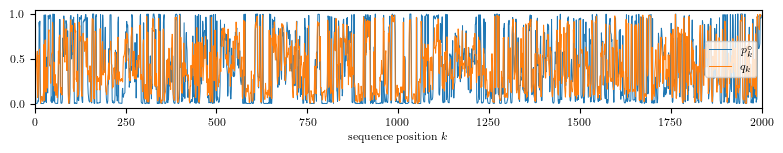

In [9]:

data_set = mir17HG
start = 0
end = 2000

filename = os.path.join(plot_dir, f"unpaired_profile_{data_set.seq_id}_{start}_{end}.pdf")

# same coordinates within full MIR17HG sequence for reproducing paper figure
#start = 2500
#end = 4500

plot.plot_unpaired(mir17HG,
                   figure_path=filename,
                   plot_interval_start = start,
                   plot_interval_end = end,
                   grey=False
                   )

### 3.2 Pairing behavior dependencies

Stochastic sampling enables the computation of dependencies in the pairing behavior, such as joint and conditional probabilities or mutual information between two positions.

The heatmap below shows the matrix of joint probabilities that two positions $i$, $j$ are simultaneously paired with color indicating the probability (as shown in the scale below).

The same plot can be used to show other kinds of pairwise dependencies, using the `what` flag. The different options are `joint_paired`, `joint_unpaired`, `cond_paired`, `cond_unpaired`, and `rnafold_bpp`. A sequence range of interest can be provided with the flags `start` and `end`, by default the full sequence is plotted.

Estimating low probabilities from a small sample can lead to large sampling errors which are especially problmeatic for conditional probabilities and mutual information. When the `threshold` option is provided, rows and columns with low marginal probability are shown in grey.\n


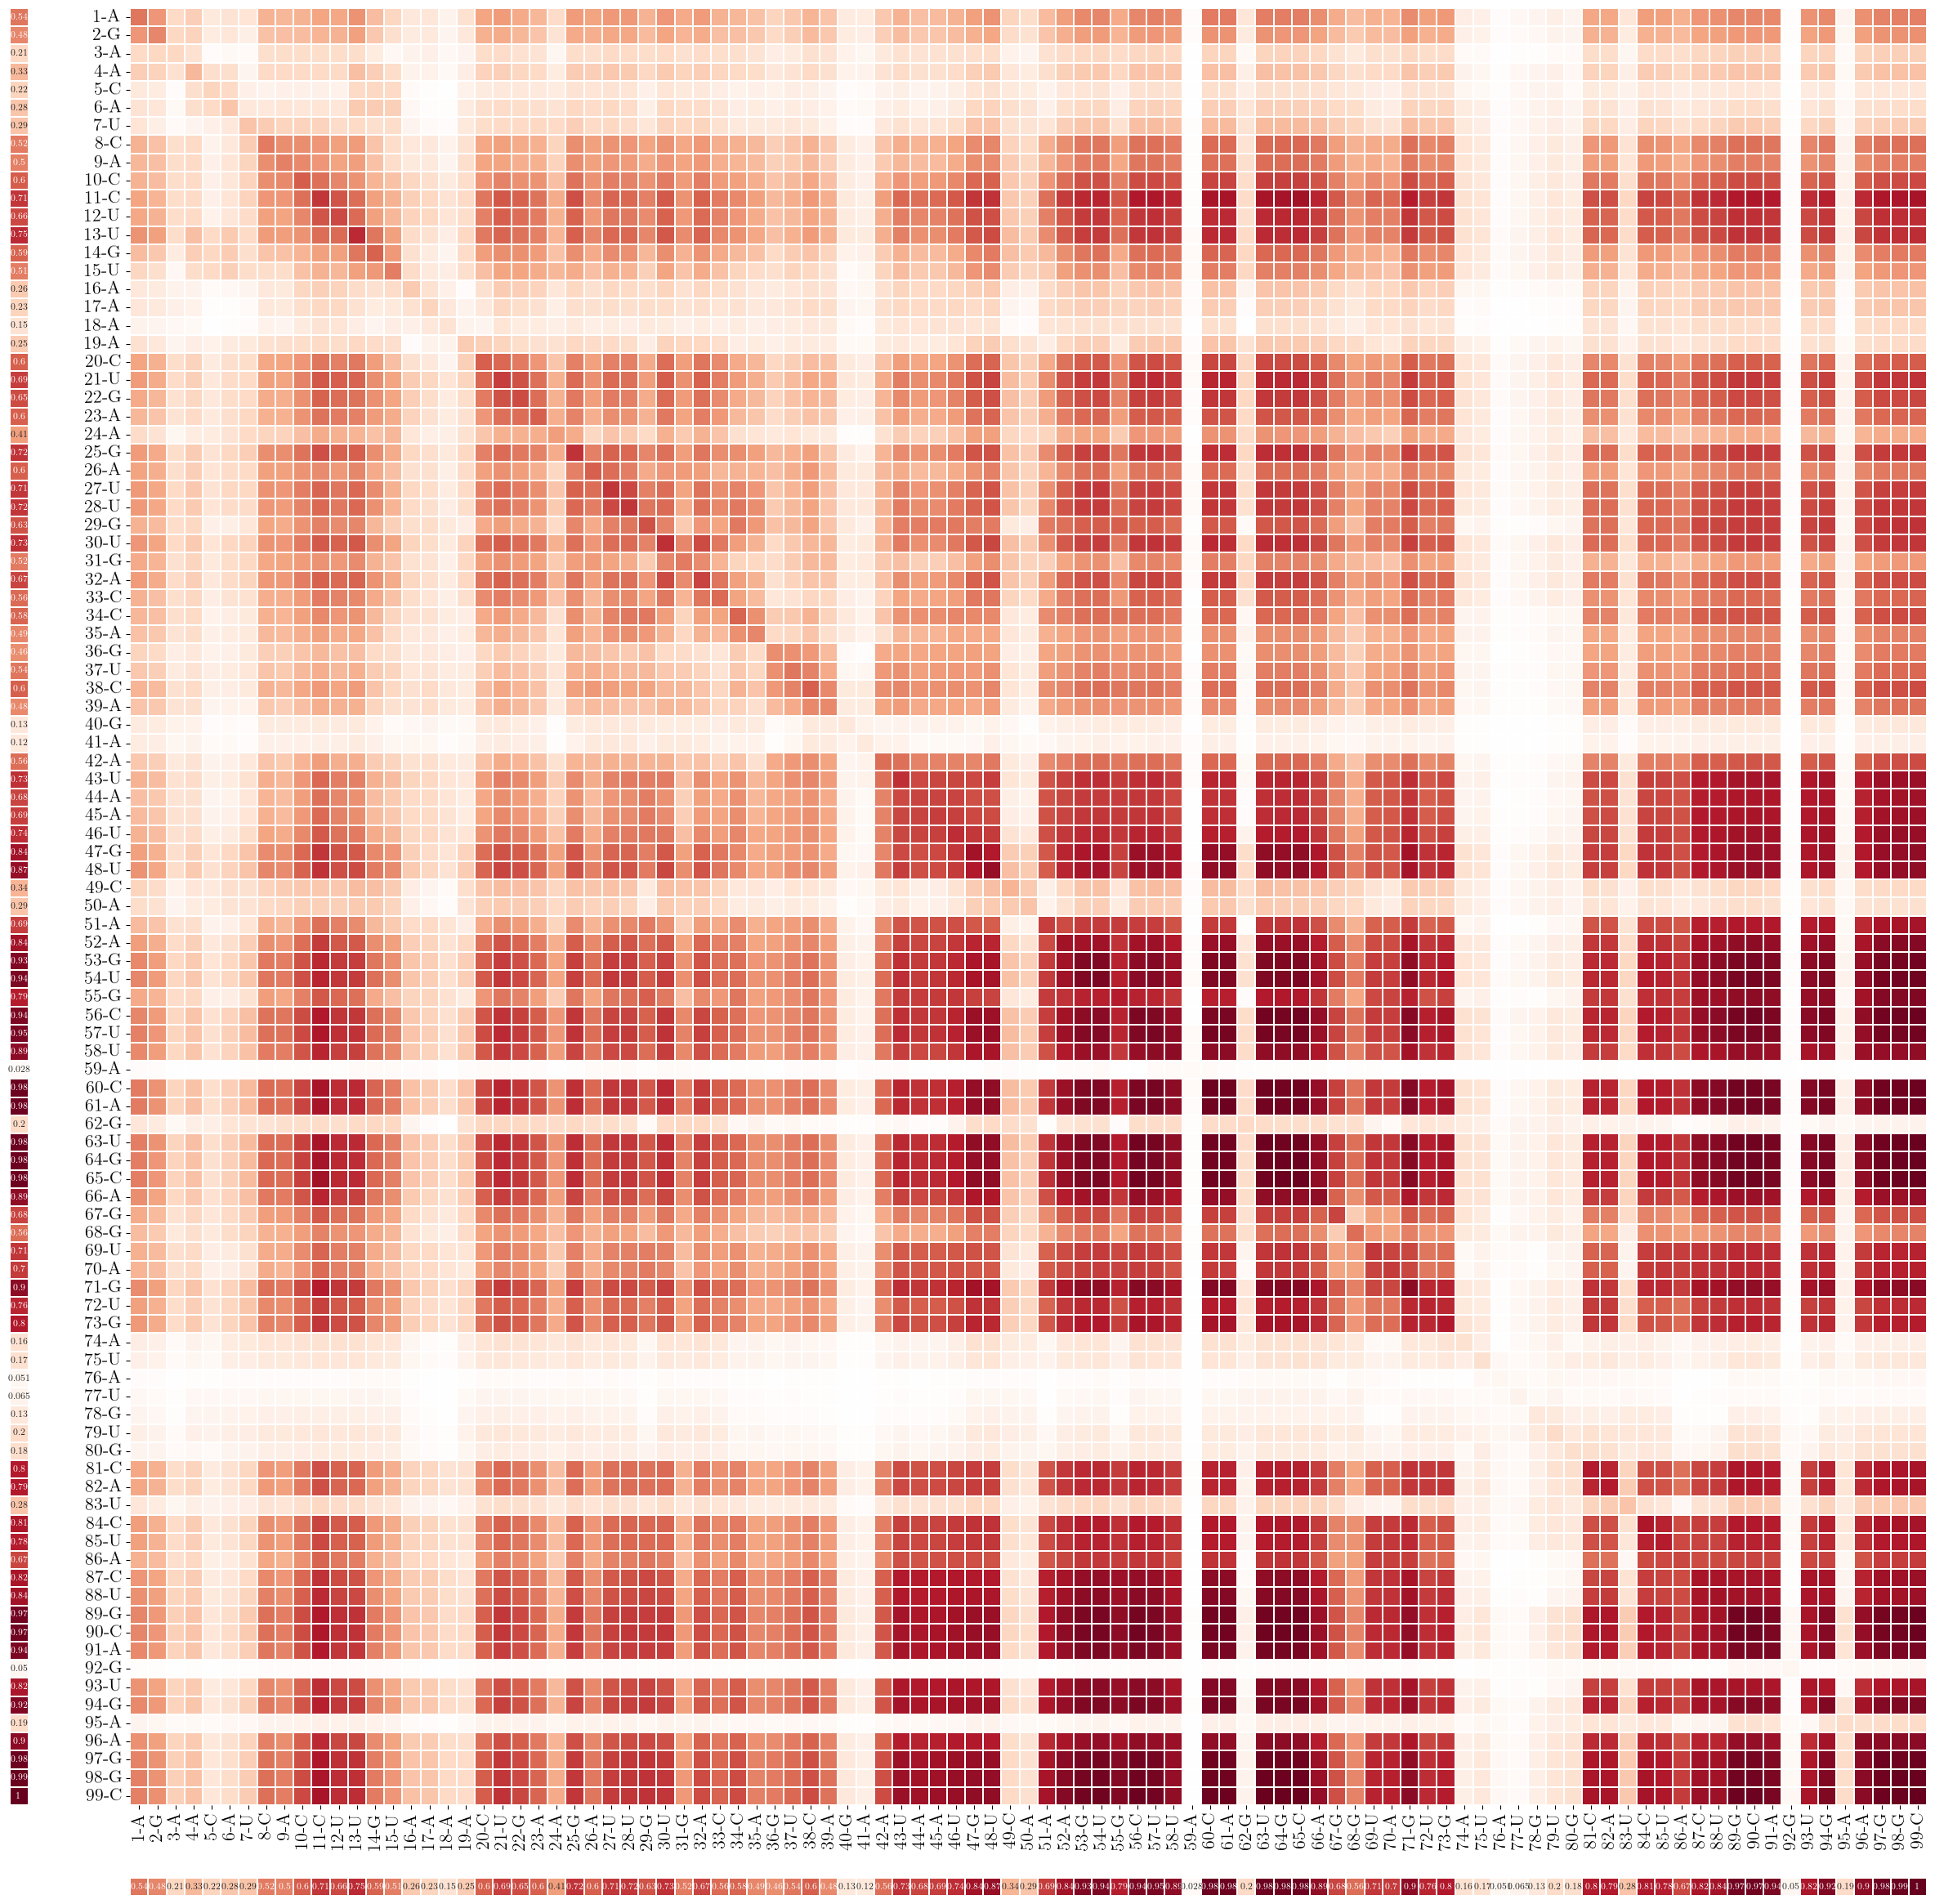

In [10]:
data_set = mir17HG
plot_feature = 'joint_paired' # for possible data to plot check description above
start = 250 # 2750 for getting mir-17 in full MIR17HG sequence
end = 350 # 2890 for getting mir-17 in full MIR17HG sequence

filename = os.path.join(plot_dir, '{seq_id}_{feature}_{start}_{end}_heatmap.pdf'.format(seq_id = data_set.seq_id , feature = plot_feature, start = start, end = end))

plot.heatmap(data_set,
                start = start+1,
                end = end,
                figure_path=filename, # provide file path to save as file
                #threshold=0.1, # to mask rows with low marginal probabilities
                #grey=False, # to plot in grey scale
                what = plot_feature, 
               )

Plot structure context of the subsequence that is depicted in above heatmap in the predicted mea structure. The subsequence from the heatmap is highlighted in grey.


end=350 has been changed to 370
i=250 has been changed to 147


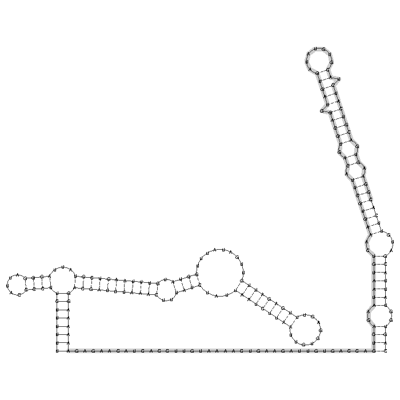

In [11]:
filename = os.path.join(plot_dir, f"struct_{data_set.seq_id}_{start}_{end}_context.eps")
plot.struct_ps(data_set, start, end, [[start,end]], context=True, figure_path = filename )
plot_mea = Image.open(filename).resize((400,400))
plot_mea

### 3.3 Maximum expected accuracy (MEA)


Paired and unpaired probabilities computed from Boltzmann sampling can in turn be used to compute a maximum expected accuracy (MEA) structure.
  
The structure plot module in the viennarna package allows the visualization of the MEA structure.

If only a subsequence is of interest the start and the end of the sequence can be provided as `start` and `end`. 
To plot the structural context of the subsequence we can provide the flag `context=True` , then the subsequence is modified such that all positions that pair with the defined subsequence are included. Otherwise, only the internal base pairs are shown.

The structue is stored into a file with the format: `struct_{seq_id}_{start}_{end}.eps`. Jupyter notebooks do not allow a good rendering of such files, therfore using an external tool to view the output file may be of advantage.

A list of sequence intervals to be annotated can be passed as an array `plot.struct_ps` in order to higlight them on the MEA plot.


In [12]:
# coordinates of known mir-mir* pairs within the example MIR17HG subsequence
annotations_short_mir17 = [ [s-2500, e-2500] for s,e in mir_17_annotations]
print(annotations_short_mir17)

[[299, 358], [437, 501], [584, 643], [753, 811], [887, 949], [1004, 1064]]


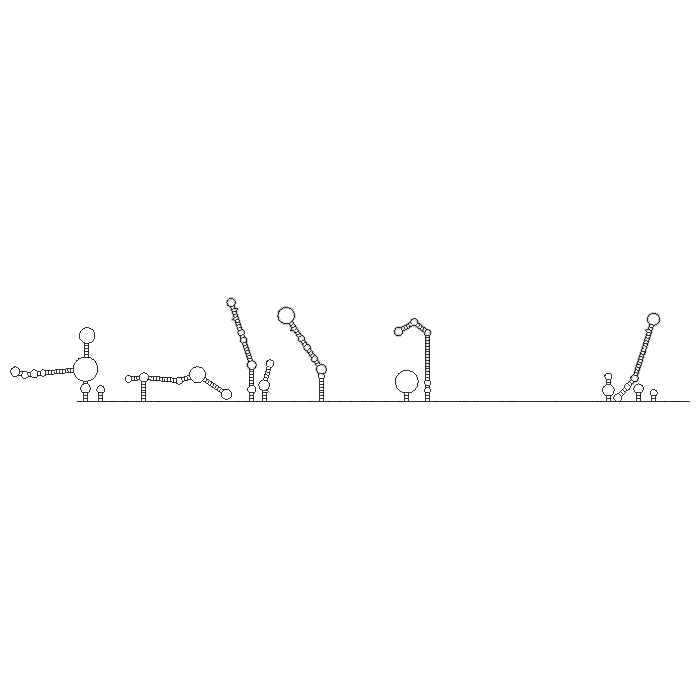

In [13]:
# annotations and coordinates for full MIR17HG
#anno = mir_17_annotations[:4]
#start = 2501
#end = 3361

anno = annotations_short_mir17[:4]
start = 1
end = 861

plot.struct_ps(mir17HG, start, end, anno)
filename = f"struct_{mir17HG.seq_id}_{start}_{end}.eps"
plot_mea = Image.open(filename)
plot_mea


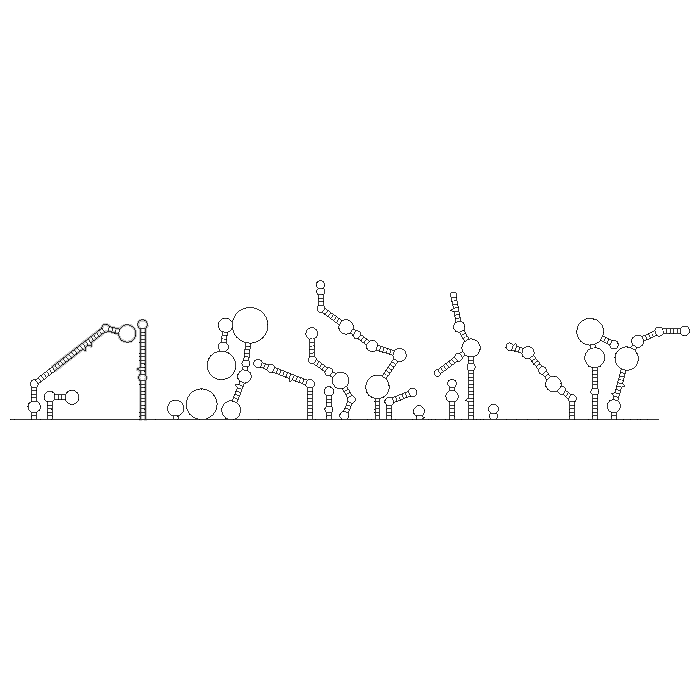

In [14]:
# annotations and coordinates for full MIR17HG
#anno = mir_17_annotations[4:]
#start = 3362
#end = 5001

anno = annotations_short_mir17[4:]
start = 862
end = 2001

plot.struct_ps(mir17HG, start, end, anno)
filename = f"struct_{mir17HG.seq_id}_{start}_{end}.eps"
plot_mea = Image.open(filename)
plot_mea

The plot below shows the differences between plotting the structural context or only the internal base pairs.

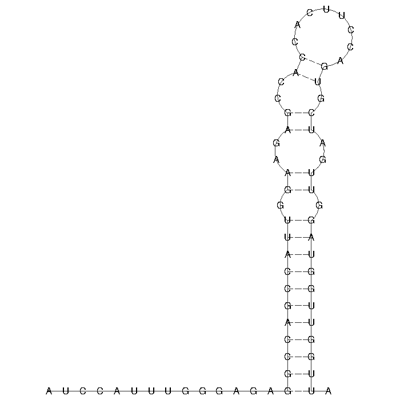

In [15]:
start = 2
end = 67

plot.struct_ps(mir17HG, start, end)
filename = f"struct_{mir17HG.seq_id}_{start}_{end}.eps"
plot_mea = Image.open(filename).resize((400,400))
plot_mea

end=67 has been changed to 118
i=2 has been changed to 2


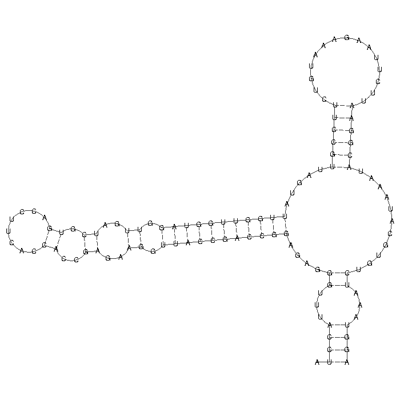

In [16]:
start = 2
end = 67

plot.struct_ps(mir17HG, start, end, context=True)
# plot.struct_ps(mir17HG, start, end, [[start,end]], context=True) # highlight input subsequence
filename = f"struct_{mir17HG.seq_id}_{start}_{end}_context.eps"
plot_mea = Image.open(filename).resize((400,400))
plot_mea

## 4. Parameter evaluation

The screening of different parameter combinations can be used to optimize analysis settings for a sepecific tasks.

### 4.1 Prediction accuray vs. sample size

In the limit of infinite sample size, the local sampling approach should return the same prediction results. The pairing behavior of any given position is informed by the number of structures that are sampled per window (`nsample`, `s`) times the number of windows that span the given position. For any position that is at least window size (`win_size`, `W`) nts away from the sequence ends, this amounts to `W*s` structures. 

The plots in this section represents the prediction accuarcy as the mean absolute difference between the predicted position wise unpaired probability from PLfold and from local sampling with respect to `W*s`.

#### Data set

In [17]:
# paper figures based on longer random sequence (5000 nts) from commented lines
# sequence = seq_data[1]['seq']
# seq_id = seq_data[1]['id']


sequence = seq_data[0]["seq"]  # 2000 nts
seq_id = seq_data[0]["id"]

# sample_sizes = [1, 2, 4, 16, 64,  256,  1024, 2048]
sample_sizes = [1, 4, 16, 64, 256, 512]
# window_sizes = [40, 80, 160, 640, 1280]
window_sizes = [40, 160,  640]

diff_winsize_bpspan = 20  # 0

unpaired_P_data = []

# get position wise unpaired probability from sampling approach and RNAplfold for a range of sample and window sizes
for nsample in sample_sizes:
    for w_size in window_sizes:

        if (
            nsample * w_size > 25000
        ):  # set limit maximum coverage per position that should be evaluated
            continue

        bp_span = w_size - diff_winsize_bpspan
        if bp_span < 20:
            continue

        print(nsample, w_size, w_size * nsample)
        results = PLfoldRevisited(
            seq_id,
            sequence,
            w_size,
            nsample,
            max_bp_span,
            data_dir,
        )

        unpaired_P_data.append(
            [
                nsample,
                w_size,
                results.local_exact.unpaired_P,
                results.local_sampling.unpaired_P,
            ]
        )


# get mean error per parameter set
unpaired_P_mean_diff = [
    [
        d[0],  # sample size
        d[1],  # window size
        np.mean(np.abs(d[2] - d[3])),  # mean absolute difference between unpaired probability from RNAplfold and the local sampling approach
        d[0] * d[1],  # number of sampled structures that cover any given position
    ]
    for d in unpaired_P_data  # for each parameter set
]


1 40 40
1 160 160
1 640 640
4 40 160
4 160 640
4 640 2560
16 40 640
16 160 2560
16 640 10240
64 40 2560
64 160 10240
256 40 10240
512 40 20480


#### Mean error vs W*s 

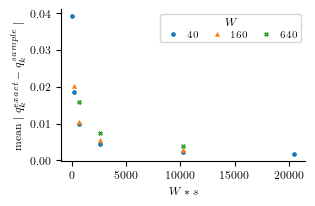

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

filename = os.path.join(plot_dir,f"{my_id}_unpairedP_diff_sampling_vs_exact.pdf")

plot.error_vs_sample_coverage(unpaired_P_mean_diff, figure_path=filename)    
    

### 4.2 Influence of window size on local folding results

The following step generates and compare the distribution of unpaired probability in dependency of the window size and in comparison to the global folding results.

#### Compute data for different window sizes

In [19]:
# choose RNA sequence here
sequence = mir_17_short_seq
my_id = mir_17_short_id
print(my_id, "\t", len(sequence))

# provide a list of window size of interest
window_sizes = [150, 300, 350, 700]

# bp_spans list should have same length as window_sizes; nth entryin window_sizes is applied togeter with nth entry in bp_spans
# maximum base pair span is set to be 20 nts shorter than window size (see also section 4.3)
bp_spans = [w - 20 for w in window_sizes]
# same bp_span for all data sets
#bp_spans = [300 for w in window_sizes]

# set sample size (see section 4.1)
nsample = 100


data = []
for i, w_len in enumerate(window_sizes):
    bp_span = bp_spans[i]
    data.append(
        PLfoldRevisited(
            seq_id=my_id,
            sequence=sequence,
            window_size=w_len,
            num_samples=nsample,
            max_bp_span=bp_span,
            data_dir=data_dir,
        )
    )


mir17HG_short 	 2000


#### Plot distribution of position wise unpaired probabilities for different window sizes $q_k$ and unpaired probabilities $p_k$ from RNAfold 

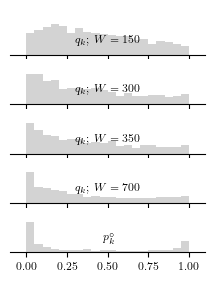

In [20]:
filename = os.path.join(plot_dir,f"{my_id}_unpairedP_histograms.png")

plot.plot_unpaired_hist(data,
                        figure_path=filename
                       )

#### Distribution of difference in the predicted unpaired probabilites between RNAfold and local sampling by window size

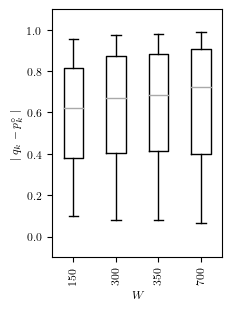

In [21]:
filename = os.path.join(plot_dir,f"{my_id}_unpairedP_diff_local_global_boxplot.png")

df_unpaired = plot.plot_error_vs_windowsize_boxplot(data,
                                                figure_path=filename
                                                )


#### Correlation beween $q_k$ and $p_k$ 

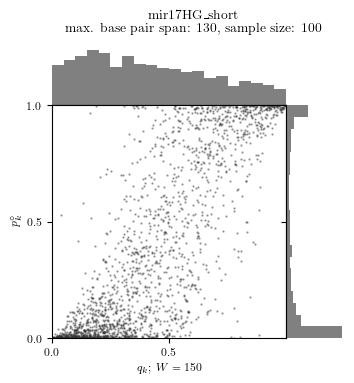

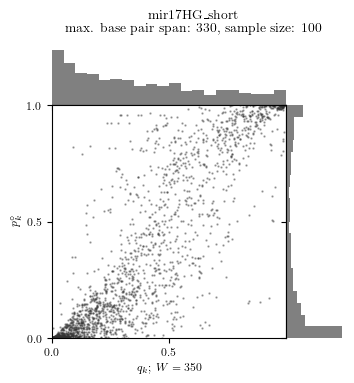

In [22]:
filename = os.path.join(plot_dir,f"{my_id}_unpairedP_correlation_local_global_scatter.png")


data = PLfoldRevisited(
    seq_id=mir_17_short_id,
    sequence=mir_17_short_seq,
    window_size=150,
    num_samples=100,
    max_bp_span=130,
    data_dir=data_dir,
    # recalculate=True,
)
                          
plot.unpairedP_correlation_local_sampling_vs_RNAfold(data)


data = PLfoldRevisited(
    seq_id=mir_17_short_id,
    sequence=mir_17_short_seq,
    window_size=350,
    num_samples=100,
    max_bp_span=330,
    data_dir=data_dir,
    # recalculate=True,
)
                          
plot.unpairedP_correlation_local_sampling_vs_RNAfold(data)

### 4.3 Setting maximum base pair span with relation to the window size
Setting max_bp_span == $W$ leads to high probabilitiesfor base pairs with a span close to the maximum base pair span. The window based methods thend to overestimate pairing probabilities (given the averaging over windows, it returns an expectation value rather than a probability).


In [23]:
window_size = 300
bp_spans     = [150, 250, 300]

mir17HG_short 	 2000


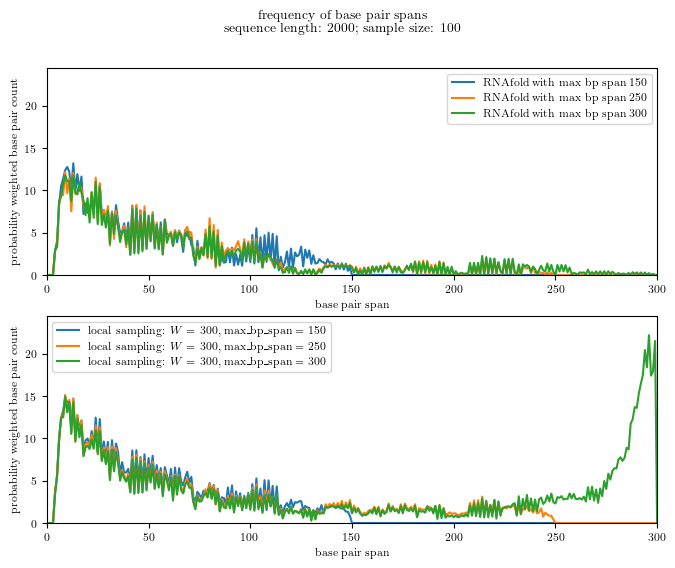

In [24]:
# choose RNA sequence here
sequence = mir_17_short_seq
my_id = mir_17_short_id
print(my_id, "\t", len(sequence))


data_dir = "data/results"
nsample = 100


data = []
for span in bp_spans:
    data.append(
        PLfoldRevisited(
            seq_id=my_id,
            sequence=sequence,
            window_size=window_size,
            num_samples=nsample,
            max_bp_span=span,
            data_dir=data_dir,
            # recalculate=True
        )
    )
plot.bp_span_hist(data)
